In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from collections import Counter

In [2]:
data = pd.read_csv('../data/raw/filtered.tsv', sep='\t')
del data["Unnamed: 0"]
data["length_diff"] = data["lenght_diff"]
del data["lenght_diff"]

In [3]:
data.to_csv('../data/interim/filtered.tsv', sep='\t')

In [4]:
data.sample(n=5)

,reference,translation,similarity,ref_tox,trn_tox,length_diff
488383,"if he hadn't adopted me, shit, I don't know wh...","if he hadn't adopted me, I wouldn't know what ...",0.831276,0.997700,0.000054,0.070423
127292,Forget this fool.,forget the goose.,0.690115,0.999698,0.000461,0.000000
374953,"I'll tell you, if someone doesn't shut this gu...","if this guy doesn't shut up, I'll do it myself.",0.785324,0.024950,0.834973,0.200000
472798,Apologize if you don't want to die. Say it.,apologize if you don't want to die.,0.922606,0.548065,0.019534,0.181818
181276,They've started killing priests. - What?,they started killing priests.,0.847263,0.038726,0.962845,0.268293


In [5]:
data.describe()

,similarity,ref_tox,trn_tox,length_diff
count,577777.000000,577777.000000,577777.000000,577777.000000
mean,0.758469,0.541372,0.434490,0.157652
std,0.092695,0.457571,0.458904,0.108057
min,0.600001,0.000033,0.000033,0.000000
25%,0.681105,0.012171,0.000707,0.066667
50%,0.754439,0.806795,0.085133,0.141791
75%,0.831244,0.990469,0.973739,0.238095
max,0.950000,0.999724,0.999730,0.400000


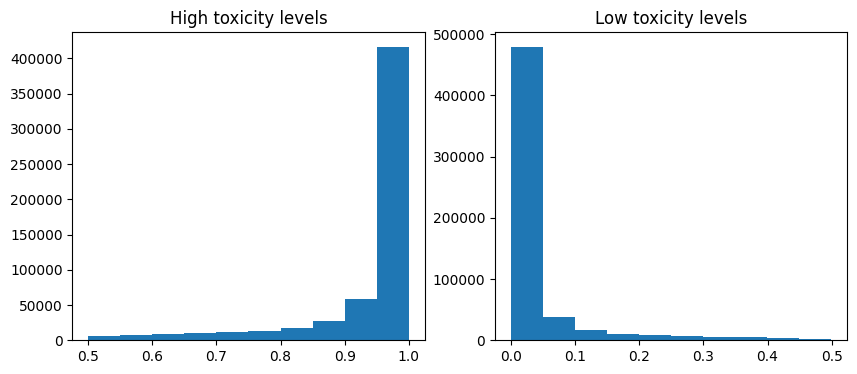

In [6]:
high_tox = np.amax(np.array([data.ref_tox.to_numpy(), data.trn_tox.to_numpy()]), axis=0)
low_tox = np.amin(np.array([data.ref_tox.to_numpy(), data.trn_tox.to_numpy()]), axis=0)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.hist(high_tox)
plt.title('High toxicity levels')
plt.subplot(122)
plt.hist(low_tox)
plt.title('Low toxicity levels');

### Difference in parallel texts toxicity

0.5000 0.9997 0.9047 0.1265


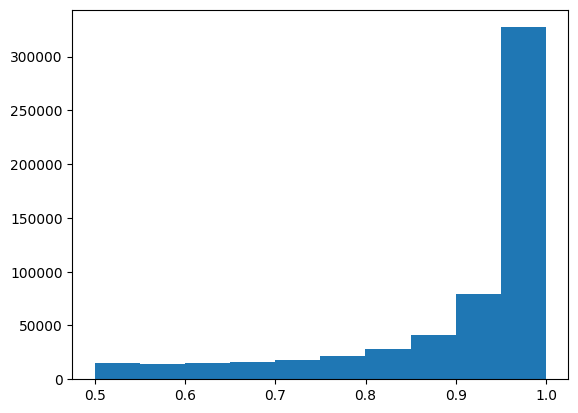

In [7]:
diff = np.abs(data.ref_tox - data.trn_tox)
print("%.4f %.4f %.4f %.4f" % (min(diff), max(diff), np.mean(diff), np.std(diff)))
plt.hist(diff);

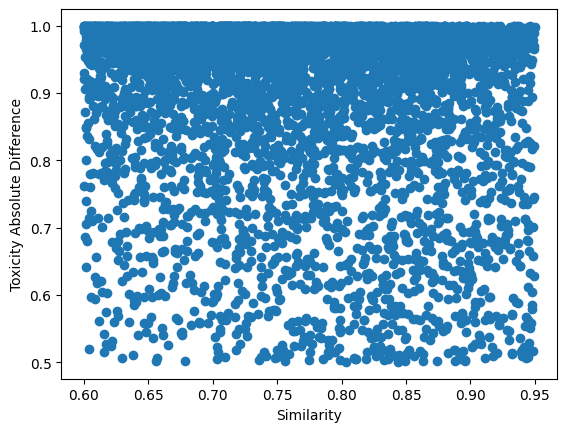

In [8]:
# random subsetting is done for density visualization purposes
random_subset = np.random.choice(data.index, size=round(len(data)*0.01), replace=False)
sub_data = data.iloc[random_subset]
plt.scatter(sub_data['similarity'], np.abs(sub_data['ref_tox'] - sub_data['trn_tox']))
plt.xlabel('Similarity') 
plt.ylabel('Toxicity Absolute Difference');

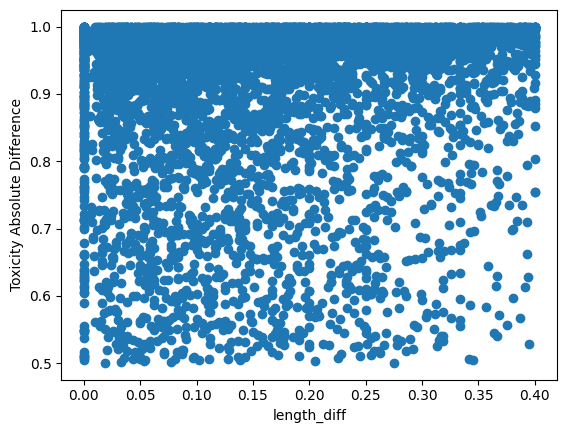

In [9]:
# random subsetting is done for density visualization purposes
random_subset = np.random.choice(data.index, size=round(len(data)*0.01), replace=False)
sub_data = data.iloc[random_subset]
plt.scatter(sub_data['length_diff'], np.abs(sub_data['ref_tox'] - sub_data['trn_tox']))
plt.xlabel('length_diff') 
plt.ylabel('Toxicity Absolute Difference');

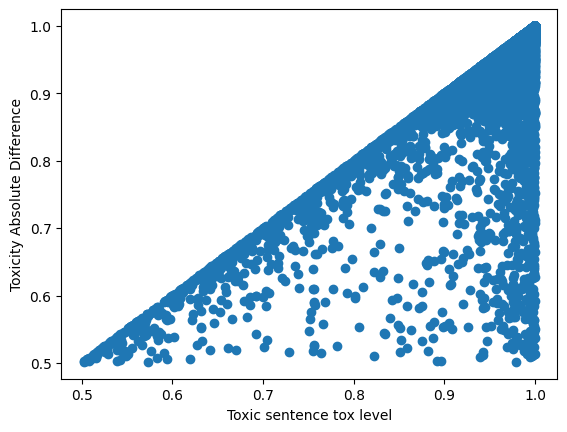

In [10]:
# random subsetting is done for density visualization purposes
random_subset = np.random.choice(data.index, size=round(len(data)*0.01), replace=False)
sub_data = data.iloc[random_subset]
sub_data_high_tox = np.amax(np.array([sub_data.ref_tox.to_numpy(), sub_data.trn_tox.to_numpy()]), axis=0)
plt.scatter(sub_data_high_tox, np.abs(sub_data['ref_tox'] - sub_data['trn_tox']))
plt.xlabel('Toxic sentence tox level') 
plt.ylabel('Toxicity Absolute Difference');

### Analyzing texts

In [11]:
high_toxicity_counter = Counter()
low_toxicity_counter = Counter()
for i, row in tqdm(data.iterrows()):
    if row["ref_tox"] < row["trn_tox"]:
        low_tox, high_tox = row["reference"], row["translation"]
    else:
        low_tox, high_tox = row["translation"], row["reference"]
    low_toxicity_counter.update(nltk.tokenize.word_tokenize(low_tox.lower()))
    high_toxicity_counter.update(nltk.tokenize.word_tokenize(high_tox.lower()))

0it [00:00, ?it/s]

In [12]:
len(high_toxicity_counter), len(low_toxicity_counter)

(89268, 96375)

In [13]:
delta = 1e3
potential_toxic_words = []
for word in tqdm(high_toxicity_counter):
    freq_diff = high_toxicity_counter.get(word, 0) - low_toxicity_counter.get(word, 0)
    if freq_diff > delta:
        potential_toxic_words.append((word, high_toxicity_counter[word], low_toxicity_counter[word]))

  0%|          | 0/89268 [00:00<?, ?it/s]

In [14]:
sorted(potential_toxic_words, key=lambda x: x[1] - x[2], reverse=True)[:30]

[('shit', 31386, 148),
 ('fucking', 30758, 437),
 ('fuck', 20028, 111),
 ('damn', 20891, 1019),
 ('a', 164057, 150506),
 ('.', 445710, 433222),
 ('kill', 20809, 8699),
 ('you', 239113, 229307),
 ('!', 70588, 61304),
 ('ass', 9229, 56),
 ('your', 59991, 50890),
 ('up', 31443, 22858),
 ('stupid', 8667, 236),
 ('shut', 9062, 1732),
 ('na', 19951, 12772),
 ('gon', 18126, 11789),
 ('hell', 20537, 14370),
 ('goddamn', 5771, 14),
 (',', 364701, 358959),
 ('fucked', 5488, 24),
 ('sex', 9485, 4041),
 ('that', 68971, 63538),
 ('shoot', 7809, 2390),
 ('fool', 6027, 936),
 ('bitch', 4654, 21),
 ('crap', 4698, 160),
 ('die', 12214, 7719),
 ('this', 40103, 35647),
 ('...', 55128, 50716),
 ('ridiculous', 4331, 202)]

In [15]:
for i in np.random.choice(data.index, size=15, replace=False):
    row = data.iloc[i]
    if row["ref_tox"] < row["trn_tox"]:
        low_tox, high_tox = row["reference"], row["translation"]
    else:
        low_tox, high_tox = row["translation"], row["reference"]
    print(high_tox)
    print(low_tox)
    print(abs(row["ref_tox"] - row["trn_tox"]), row["similarity"])
    print('-' * 45)

You are naive like a kid.
you're hired as a kid.
0.917073304008227 0.634618695393
---------------------------------------------
Those pictures in your head of Russia, bread lines, shitty little apartments, ancient cars. kodoroff and his friends made sure that it never applied to them.
as for those pictures of Russia, what you wear in your head, queuing for bread, crumbling small apartments, old cars, Kodorov and his friends took care to never meet them.
0.972019998531323 0.8121411667
---------------------------------------------
He's a relic of the nineteenth century, pretty fast with a hangman's rope but his voice doesn't mean doodlly-shit outside of South Africa."
a sad remnant of the nineteenth century, which may well be wielding a hangman's noose, but outside of the border of South Africa, it does not mean his voice is more than a scuffle of fleas. "
0.945890840375796 0.83025304728
---------------------------------------------
the body will be burned.
The body is to be cremated.
0.

### Conclusions from the preliminary EDA:

The scatterplot of (toxic sentences measurements, toxicity drop) has a centrality around $x=y$ line, which indicates that the overall quality of the dataset is good and lower toxicity sentences tend to remove almost all toxicity from the high tox sentence.

There are, however, several examples in which the drop in toxicity is low (between 0.5 and 0.7), so if the model's performance is unsatisfactory, an option would be to further descrease the probability of encountering such examples (using WeightedRandomSampler with weights dependent on the toxicity change)

There are sentences in which the detoxification can be done by just replacing several words, so the baseline could be just toxic words mapping to non-toxic equivalent